In [2]:
#Librerias usadas:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D

### Los objetivos del trabajo son:

1. Leer los archivos csv para realizar los DataFrames
2. Unir varios DataFrames en uno solo
3. Realizar un resampleo para los datos en intervalos de meses, dias y minutos
4. Evaluar las graficas con varios modelos de regresión para saber cual se ajusta mejor
5. Conclusión

## 1)Lectura de archivos

Mediante el  comando pd.read_csv, se hizo la lectura de cada archivo y se convirtio en un DataFrame

In [3]:
# usamos pd.read_csv("nombre del archivo"), con esto nos lee un archivo de datos y lo convierte en Dataframe
voltage = pd.read_csv("voltage.csv")
globalre = pd.read_csv("Global_reactive_power.csv")
globalint = pd.read_csv("Global_intensity.csv")
globalact = pd.read_csv("Global_active_power.csv")

## 2)Union de los DateFrames

Unimos cada DataFrame en uno solo, esto se realizo de a parejas ,porque con el comando pd.merge solo se pueden unir de a dos DataFrame

In [4]:
#con el comando pd.merge("columna1, columna2, on = "columna en comun"), podemos realizar una fusión (como 
# su nombre lo dice), de varias columnas.
a = pd.merge(voltage,globalint,on="Datetime")
b = pd.merge(a,globalre,on="Datetime")
c = pd.merge(b,globalact, on = "Datetime")
c

,Datetime,Voltage,Global_intensity,Global_reactive_power,Global_active_power
0,2010-01-01 00:00:00,240.65,7.4,0.236,1.790
1,2010-01-01 00:01:00,240.07,7.4,0.234,1.780
2,2010-01-01 00:02:00,240.15,7.4,0.234,1.780
3,2010-01-01 00:03:00,240.26,7.2,0.186,1.746
4,2010-01-01 00:04:00,240.12,7.0,0.102,1.686
...,...,...,...,...,...
457390,2010-11-26 20:58:00,240.43,4.0,0.000,0.946
457391,2010-11-26 20:59:00,240.00,4.0,0.000,0.944
457392,2010-11-26 21:00:00,239.82,3.8,0.000,0.938
457393,2010-11-26 21:01:00,239.70,3.8,0.000,0.934


Debido a los indices que tienen los archivos, se debe pasar la columna "Datetime" a la correcta notación de Datetime y luego debido a que los indices son numericos y el resample solo lee indices Datetime, se le cambia el indice para que haga correctamente el resample

In [5]:
# pd.to_datetime("columna"), nos permite cambiar valores a un formato de Datetime
c["Datetime"] = pd.to_datetime(c["Datetime"])
# dataframe.set_index("Columna"), cambia el indice
c = c.set_index("Datetime")
c

,Voltage,Global_intensity,Global_reactive_power,Global_active_power
Datetime,,,,
2010-01-01 00:00:00,240.65,7.4,0.236,1.790
2010-01-01 00:01:00,240.07,7.4,0.234,1.780
2010-01-01 00:02:00,240.15,7.4,0.234,1.780
2010-01-01 00:03:00,240.26,7.2,0.186,1.746
2010-01-01 00:04:00,240.12,7.0,0.102,1.686
...,...,...,...,...
2010-11-26 20:58:00,240.43,4.0,0.000,0.946
2010-11-26 20:59:00,240.00,4.0,0.000,0.944
2010-11-26 21:00:00,239.82,3.8,0.000,0.938


## 3) Resample

En esta casilla resampleamos cada uno por el rango de tiempo que se nos pedia, es decir meses, dias y minutos.

In [6]:
#con este comando se puede resamplear por intervalos de tiempo (en este caso), gracias a que esta en 
#formato de date time, "M" es para meses, "D" para dias y si quisieramos minutos "T", y luego lo mandamos a promediar
#los datos
mes =  c.resample("M").mean()
dias = c.resample("D").mean()
minutos = c
mes

,Voltage,Global_intensity,Global_reactive_power,Global_active_power
Datetime,,,,
2010-01-31,242.338522,5.430332,0.125182,1.300640
2010-02-28,242.002101,4.836624,0.109467,1.157539
2010-03-31,241.475284,4.920399,0.136368,1.170015
2010-04-30,241.442527,4.363496,0.129557,1.036334
2010-05-31,241.296151,4.551504,0.127221,1.075957
2010-06-30,240.888985,4.170282,0.145525,0.975306
2010-07-31,240.965167,3.337202,0.138093,0.778947
2010-08-31,241.422944,3.954423,0.130815,0.929452
2010-09-30,241.267517,4.223837,0.127700,0.997541


In [7]:
dias

,Voltage,Global_intensity,Global_reactive_power,Global_active_power
Datetime,,,,
2010-01-01,242.565722,3.537083,0.114817,0.850175
2010-01-02,243.631743,4.857778,0.086656,1.176235
2010-01-03,241.822778,3.757778,0.090331,0.901894
2010-01-04,241.754160,4.879028,0.100322,1.171833
2010-01-05,240.647167,3.929861,0.133697,0.916776
...,...,...,...,...
2010-12-07,240.218646,3.397222,0.198550,0.770538
2010-12-08,240.794931,1.623750,0.117429,0.367846
2010-12-09,241.619722,4.755694,0.139832,1.119508


In [8]:
minutos

,Voltage,Global_intensity,Global_reactive_power,Global_active_power
Datetime,,,,
2010-01-01 00:00:00,240.65,7.4,0.236,1.790
2010-01-01 00:01:00,240.07,7.4,0.234,1.780
2010-01-01 00:02:00,240.15,7.4,0.234,1.780
2010-01-01 00:03:00,240.26,7.2,0.186,1.746
2010-01-01 00:04:00,240.12,7.0,0.102,1.686
...,...,...,...,...
2010-11-26 20:58:00,240.43,4.0,0.000,0.946
2010-11-26 20:59:00,240.00,4.0,0.000,0.944
2010-11-26 21:00:00,239.82,3.8,0.000,0.938


## 4) Regresiones

### 4.0.1) Definición de los modelos

Definimos cada modelo en una funcion, le asignamos las variables que son:

x : variable independiente \
a : pendiente\
b : ordenada al origen

In [9]:
#definicion de las funciones de cada modelo
def f(x,a,b):
    return a*x + b
def g(x,a,b):
    return a*x +b
def h(X,a_1,a_2,b):
    x,y = X
    return a_1*x + a_2*y + b

### 4.1) Regresión por mes

In [10]:
# se le indica las columnas de cada variable (para los datos del  mes)
vgm = mes["Voltage"]
inm = mes["Global_intensity"]
grpm = mes["Global_reactive_power"]
gapm = mes["Global_active_power"]


 ### 4.1.1) Modelo 1

Definimos el modelo que con el comando curve_fit nos dara los resultados mas optimos para a y b, tambien le ponemos cov1 que nos dara una matriz con la desviacion estandar

In [11]:
#aplicación del curve_fit() al primer modelo, model1 es la matriz con los valores de a y b
#cov1 la matriz de covarianza
model1,cov1 = curve_fit(f,inm,gapm)
model1

array([ 0.25042854, -0.06067193])

Realizamos las graficas de los puntos originales y el modelo que acabamos de definir

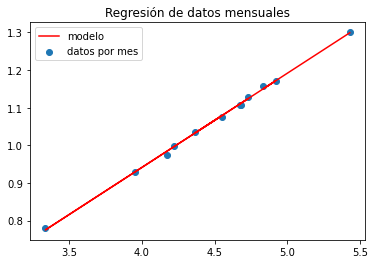

In [12]:
#grafica del modelo1 para datos mensuales, con su respectiva regresión
plt.figure()
plt.title("Regresión de datos mensuales")
plt.scatter(inm,gapm, label = "datos por mes")
plt.plot(inm,f(inm, *model1), "r", label = "modelo")
plt.legend()

 ### 4.1.2) Modelo 2

In [13]:
#ajuste con curve_fit
modelo2,cov2 = curve_fit(g,vgm,gapm)
cov2

array([[ 3.59400196e-03, -8.67969399e-01],
       [-8.67969399e-01,  2.09619833e+02]])

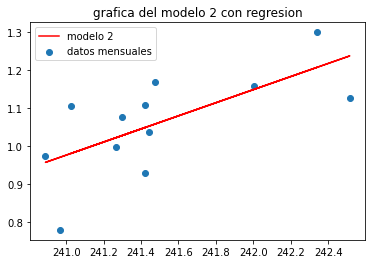

In [14]:
plt.scatter(vgm,gapm, label = "datos mensuales")
plt.plot(vgm,g(vgm, *modelo2),"r",label = "modelo 2" )
plt.title("grafica del modelo 2 con regresion")
plt.legend()

### 4.1.3) Modelo 3

 el modelo numero 3 tiene dos variables independientes y una ordenada en el origen, por consecuente se debe realizar una grafica en 3D

In [15]:
#curve fit solo acepta dos variables, por lo cual en el modelo ponemos dos variables dentro de una
#lo cual arregla este problema
modelo3, cov3 = curve_fit(h,(inm,vgm),gapm)
modelo3

array([ 0.24524991,  0.00808133, -1.98910306])

Como intuimos el modelo se debe asemejar al de un plano debido a la ecuacion que tiene $0 = A_{31} (globalintensity) + A_{32} (Voltage) - global active power + B_3 $. Para realizar este plano se usaran dos puntos y el vector normal. tambien el comando np.meshgrid, que lo que hara es aceptar unas coordenadas de un segmento del plano y darnos en arrays las coordenadas de dicho plano

In [16]:
#np.meshgrid(valores en x del segmento , valores en y del segmento, valores en z)
xx , yy= np.meshgrid(inm,vgm)

Para realizar esta seccion debemos definir el vector normal que en una ecuacion del plano ($ax + by + cz + d = 0$) tendria coordenadas $v_n = (a,b,c)$

In [17]:
#se realiza el calculo del vector normal
vn = ( modelo3[0] , modelo3[1] , -1 )
d =modelo3[2]
#calculamos el componente z en base a los xx y yy para que nos quede en forma de dos matrices para que realice la grafica correctamente
z = (-vn[0]*xx - vn[1]*yy - d) * 1. / vn[2]

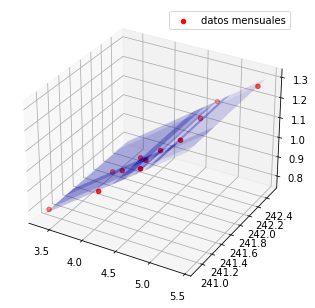

In [18]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(inm,vgm,gapm, c = "r",label = "datos mensuales")
ax.plot_surface(xx,yy,z, color = "blue", alpha = 0.06 )
ax.legend()

### 4.2) Regresión por dias

### 4.2.1) Modelo 1 

In [19]:
# se le indica las columnas de cada variable (para los datos de cada dia)
vgd = dias["Voltage"]
ind = dias["Global_intensity"]
grpd = dias["Global_reactive_power"]
gapd = dias["Global_active_power"]

In [20]:
#para quitar los datos vacios usamos el comando dataframe.dropna()
vgd = vgd.dropna()
ind = ind.dropna()
grpd = grpd.dropna()
gapd = gapd.dropna()

In [21]:
modelo1d, cov1d = curve_fit(f,ind,gapd)
modelo1d

array([ 0.24305793, -0.02753221])

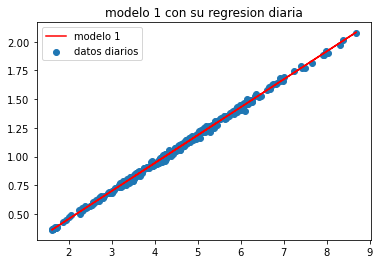

In [22]:
plt.scatter(ind,gapd, label = "datos diarios")
plt.plot(ind,f(ind, *modelo1d),"r", label = "modelo 1")
plt.title("modelo 1 con su regresion diaria")
plt.legend()

### 4.2.2) Modelo 2

In [23]:
modelo2d, cov2d = curve_fit(g,vgd,gapd)
modelo2d

array([ 0.0296603 , -6.10166907])

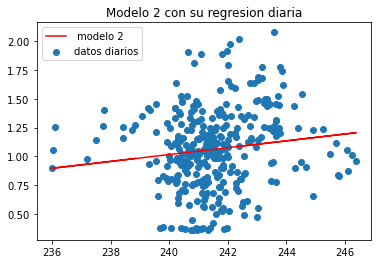

In [24]:
plt.scatter(vgd,gapd, label = "datos diarios")
plt.plot(vgd,g( vgd, *modelo2d),"r", label = " modelo 2")
plt.title("Modelo 2 con su regresion diaria")
plt.legend()

### 4.2.3)  Modelo 3

In [25]:
modelo3d, cov3d = curve_fit(h,(ind,vgd),gapd)
modelo3d

array([ 0.24235044,  0.00617299, -1.51527187])

In [26]:
#np.meshgrid(valores en x del segmento , valores en y del segmento, valores en z)
xx2 , yy2 = np.meshgrid(ind,vgd)

In [27]:
#realizamos el mismo procedimiento que con las anterior modelo
vn2 = ( modelo3d[0] , modelo3d[1] , -1 )
d2 = modelo3d[2]
z2 = (-vn2[0]*xx2 - vn2[1]*yy2 - d2) * 1. / vn2[2]

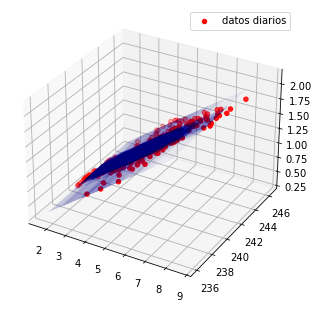

In [28]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(ind,vgd,gapd,c = "r", label = "datos diarios")
ax.plot_surface(xx2,yy2,z2, color = "blue", alpha = 0.01 )
ax.legend()

###  4.3) regresion por minutos

In [29]:
vgt = minutos["Voltage"]
intt = minutos["Global_intensity"]
grpt = minutos["Global_reactive_power"]
gapt = minutos["Global_active_power"]

### 4.3.1) Modelo 1

In [30]:
modelot1,covt1 = curve_fit(f,intt,gapt)
covt1

array([[ 3.46180362e-10, -1.55034856e-09],
       [-1.55034856e-09,  1.22472325e-08]])

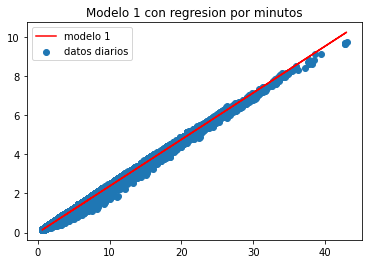

In [31]:
plt.scatter(intt,gapt, label = "datos diarios")
plt.plot(intt,f(intt, *modelot1),"r", label = "modelo 1")
plt.title("Modelo 1 con regresion por minutos")
plt.legend()

### 4.3.2) Modelo 2

In [32]:
modelot2,covt2 = curve_fit(g,vgt,gapt)
covt2

array([[ 1.93757045e-07, -4.67953331e-05],
       [-4.67953331e-05,  1.13033742e-02]])

Text(0.5, 1.0, 'Modelo 2 con su regresión por minutos')

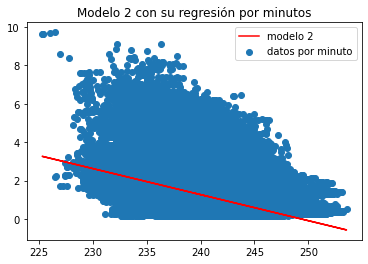

In [33]:
plt.scatter(vgt,gapt, label = "datos por minuto")
plt.plot(vgt,g(vgt, *modelot2),"r",label = "modelo 2")
plt.legend()
plt.title("Modelo 2 con su regresión por minutos")

### 4.3.3) Modelo 3

In [34]:
modelot3, covt3 = curve_fit(h,(intt,vgt),gapt)
modelot3

array([ 0.23947996,  0.00466923, -1.13918528])

Para los minutos (457395 datos), el comando np.meshgrid no nos ejecuto  debido en un error relacionada a la cantidad de memoria necesaria para realizar la operacion 

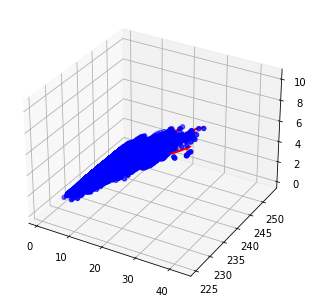

In [35]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(intt,vgt,gapt,c = "b")
ax.plot(intt,vgt,h((intt,vgt), *modelot3),c ="r")

###  4.4) Comparación 

Para este analisis tomaremos la matriz de covarianza dada por curve_fit() y miraremos cual de todas es la que es menor para notar cual es la que mejor se ajusta 

In [36]:
#diagonales del primer modelo
np.min(np.diag(cov1)),np.min(np.diag(cov1d)),np.min(np.diag(covt1))

(6.532130244338177e-06, 3.6052411086630155e-07, 3.461803617242397e-10)

In [37]:
#diagonales del segundo modelo
np.min(np.diag(cov2)),np.min(np.diag(cov2d)),np.min(np.diag(covt2))

(0.003594001958413927, 0.00015318930613452054, 1.9375704489434684e-07)

In [38]:
#diagonales del tercer modelo
np.min(np.diag(cov3)),np.min(np.diag(cov3d)),np.min(np.diag(covt3))

(5.819624477345773e-06, 1.9016637641134477e-07, 3.982782079433003e-10)

In [39]:
def e1(e,x):
    return e / np.sqrt(x)

In [40]:
em1m = e1(np.min(np.diag(cov1)),12)
em2m = e1(np.min(np.diag(cov2)),12)
em3m = e1(np.min(np.diag(cov3)),12)

In [41]:
em1d = e1(np.min(np.diag(cov1d)),323)
em2d = e1(np.min(np.diag(cov2d)),323)
em3d = e1(np.min(np.diag(cov3)),323)
em3d

3.238125678920386e-07

In [42]:
em1t = e1(np.min(np.diag(covt1)),457395)
em2t = e1(np.min(np.diag(covt2)),457395)
em3t = e1(np.min(np.diag(covt3)),457395)

In [43]:
em1m,em2m,em3m

(1.8856635774751712e-06, 0.0010374989990791616, 1.6799808792890587e-06)

In [44]:
em1d,em2d,em3d

(2.0060098135379205e-08, 8.523681001431642e-06, 3.238125678920386e-07)

In [45]:
em1t,em2t,em3t

(5.11866516097793e-13, 2.8649153593084513e-10, 5.888990285936682e-13)

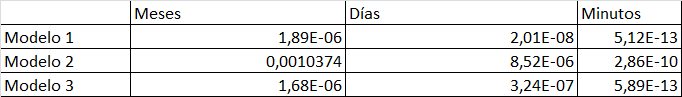

## 5) Conclusiones

A partir de los datos numericos obtenidos, podemos denotar que el error minimo se obtuvo en el modelo 3. Tambien se puede destacar que cuando hay una gran cantidad de datos hay menor error como es el caso de los minutos, mientras que si se realiza con el resampleo de los meses, se obtiene un error mucho mayor. Podemos ver que la  relacion mas inexacta es la del Modelo 2. 
Cabe aclarar que esto tambien se puede comprobar de manera grafica.